06 feb 2024

In [ ]:
## API
## YAHOO FINANCE API
## OXY -- OCCIDENTAL PETROLEUM CORPORATION
## 2019 - 2023


In [40]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [2]:
## extract the data from the api
!pip install yfinance


[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: C:\Users\AbayomiBello\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import yfinance as yf
data = yf.download('OXY', start= '2019-03-31', end='2023-03-31')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-01,66.889999,67.279999,66.540001,67.180000,60.873142,2809900
2019-04-02,67.209999,67.629997,66.190002,66.629997,60.374779,3312400
2019-04-03,67.230003,67.230003,65.839996,66.059998,59.858292,3056700
2019-04-04,66.110001,66.620003,65.570000,66.440002,60.202610,2855700
2019-04-05,66.660004,68.360001,66.650002,68.040001,61.652409,3808400
...,...,...,...,...,...,...
2023-03-24,57.880001,58.599998,57.029999,58.180000,58.180000,13598000
2023-03-27,58.700001,59.860001,58.029999,59.650002,59.650002,14419700
2023-03-28,60.650002,62.349998,60.560001,62.209999,62.209999,21795500


In [4]:
## re indexing
data = data.reindex(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close', 'Close'])
data

,High,Low,Open,Volume,Adj Close,Close
Date,,,,,,
2019-04-01,67.279999,66.540001,66.889999,2809900,60.873142,67.180000
2019-04-02,67.629997,66.190002,67.209999,3312400,60.374779,66.629997
2019-04-03,67.230003,65.839996,67.230003,3056700,59.858292,66.059998
2019-04-04,66.620003,65.570000,66.110001,2855700,60.202610,66.440002
2019-04-05,68.360001,66.650002,66.660004,3808400,61.652409,68.040001
...,...,...,...,...,...,...
2023-03-24,58.599998,57.029999,57.880001,13598000,58.180000,58.180000
2023-03-27,59.860001,58.029999,58.700001,14419700,59.650002,59.650002
2023-03-28,62.349998,60.560001,60.650002,21795500,62.209999,62.209999


In [5]:
## save our dataset in a csv file
data.to_csv('oxy.csv')


In [7]:
## read from csv file
stock_data = pd.read_csv('oxy.csv')
stock_data.head()

,Date,High,Low,Open,Volume,Adj Close,Close
0,2019-04-01,67.279999,66.540001,66.889999,2809900,60.873142,67.180000
1,2019-04-02,67.629997,66.190002,67.209999,3312400,60.374779,66.629997
2,2019-04-03,67.230003,65.839996,67.230003,3056700,59.858292,66.059998
3,2019-04-04,66.620003,65.570000,66.110001,2855700,60.202610,66.440002
4,2019-04-05,68.360001,66.650002,66.660004,3808400,61.652409,68.040001


In [8]:
## checking the data for null values
stock_data.isnull().sum()

Date         0
High         0
Low          0
Open         0
Volume       0
Adj Close    0
Close        0
dtype: int64

In [42]:
##check for correlation
corr_mat = stock_data.corr(numeric_only=True)
corr_mat

,High,Low,Open,Volume,Adj Close,Close
High,1.000000,0.998883,0.999096,-0.223955,0.997043,0.999221
Low,0.998883,1.000000,0.999195,-0.255933,0.995814,0.999151
Open,0.999096,0.999195,1.000000,-0.243632,0.995321,0.998228
Volume,-0.223955,-0.255933,-0.243632,1.000000,-0.213819,-0.235651
Adj Close,0.997043,0.995814,0.995321,-0.213819,1.000000,0.997295
Close,0.999221,0.999151,0.998228,-0.235651,0.997295,1.000000


<AxesSubplot: >

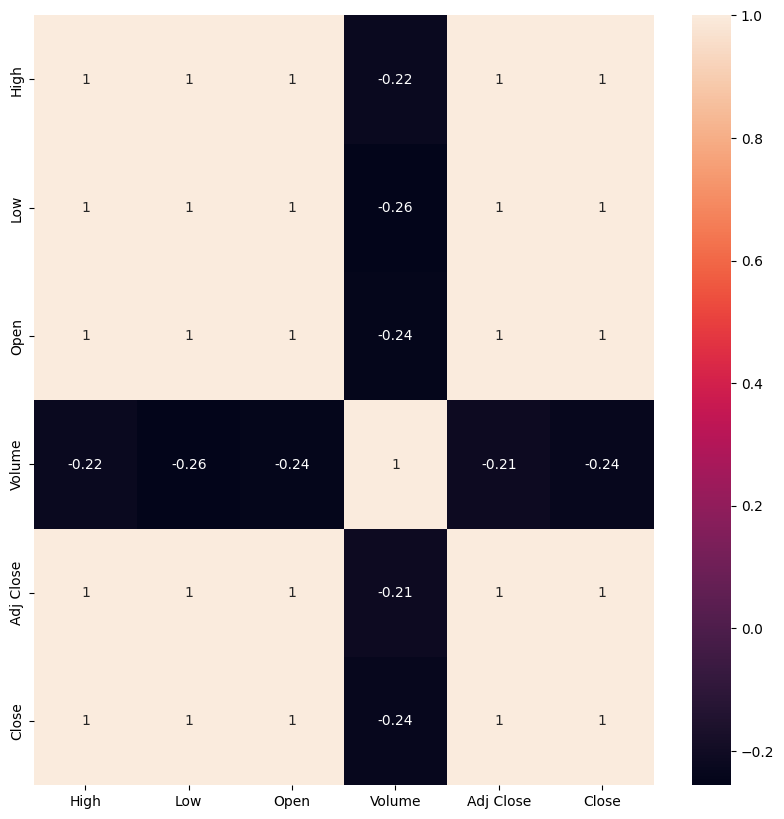

In [43]:
##showing correlation using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot=True)


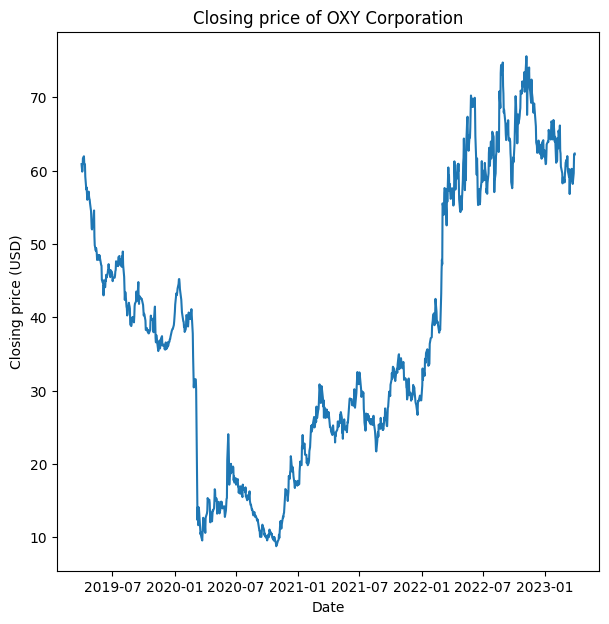

In [17]:
## plot a chart to see the price action of oxy before and after pandemic
plt.figure(figsize=(7,7))
plt.title('Closing price of OXY Corporation')
plt.plot(data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Closing price (USD)')
plt.show()

In [24]:
## splitting the dependent and independent variable
X = stock_data.iloc[:, 1:6].values
y = stock_data.iloc[:, 6].values

In [27]:
## data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [31]:
## FEATURE SCALING
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [35]:
## linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [36]:
## prediction
y_pred = lin_reg.predict(X_test)

In [37]:
## CREATE A DATAFRAME THAT WILL SHOW THE ACTUAL CLOSING STOCK PRICE AND THE PREDICTED STOCK PRICE
pred = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
pred

,Actual Value,Predicted Value
0,70.550003,70.621354
1,68.459999,68.770483
2,57.230000,57.131261
3,11.290000,11.182796
4,26.620001,26.864349
...,...,...
197,45.580002,45.345749
198,31.980000,31.885449
199,11.070000,11.028379
200,44.619999,44.568416


In [ ]:
## metric in regression
## RSQUARED 0 --is not good, 1-- good ----
## MEAN ABSOLUTE ERROR -- average absolute value between actual values and predicted values
## MEAN SQUARED ERROR -- measure the average squraed differneces between the actual and the predicted values 
##ROOT MEAN SQUARED ERROR --- is just the square root of the mean square error

In [41]:
meanAbError = metrics.mean_absolute_error(y_test, y_pred)
meanSqError = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqrr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared:{:.2f}'.format(lin_reg.score(X_test, y_test)))
print('Mean Absolute Error:', meanAbError)
print('Mean Square Error:', meanSqError)
print('Root Mean Square Error:', rootMeanSqrr)

R squared:1.00
Mean Absolute Error: 0.33210723183159935
Mean Square Error: 0.18898047060424697
Root Mean Square Error: 0.43471884086642365
